# Proyecto Módulo 1 
# Optimización Agrícola
## Simulación Matemática
<img style="float: right; margin: 0px 0px 15px 15px;" src="http://alef.mx/wp-content/uploads/2015/09/Ganado-vacas-establo-alimento-c.jpg" width="450px" height="150px" />
Integrantes:
<li>- Ernesto Díaz </li>
<li>- Rafael González </li>

Profesor:
 Lázaro Alonso

### Objetivos Generales

> - Utilizando los temas de programación lineal  y optimización de funciones con Python llevar acabo un proyecto aplicado en la vida real que demuestre una solucion viable y optima.
> - Poner en práctica el manejo de herramientas como Github y Gitkraken para la colaboración en proyectos en Python.

### Objetivos Especificos

> - Determinar la cantidad de sacos de alimento de cada marca que recomandamos comprar a nuestro consumidor, de forma que se pueda obtenerse el menor costo posible cumpliendo con las siguientes restricciones.
> - Poder mostrar de forma gráfica al cliente cual es la cantidad de alimento de cada marca que mejor se ajusta para minimizar sus gastos.

La marca x cuesta $25 por saco(contiene 2 unidades de nutriente A, 2 unidades de B y 2 unidades de C).

La marca y cuesta $20 por saco(contiene 1 unidad de nutriente A, 9 unidades de B y 3 unidades de C).

Los requerimentos minimos por nutriente son de 12 unidades de A, 36 de B y 24 de C.

Función a minimizar y restricciones del problema

\begin{equation}
\begin{array}{ll}
\min_{x,y} & 25x+20y \\
\text{s. a. }  & 2x+y\geq 12 \\
               & 2x+9y\geq 36 \\
               & 2x+3y\geq 24,
\end{array}
\end{equation}

In [1]:
import numpy as np
import sympy as sym
sym.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

In [2]:
c = np.array([25, 20])                   
A = np.array([[-2, -1], [-2, -9], [-2, -3]])
b = np.array([-12, -36, -24])
x_bound = (0, None)
y_bound = (0, None)

In [3]:
c    ##Coeficientes de la funcion objetivo

array([25, 20])

In [4]:
A    ##Matriz de coeficientes de las restricciones de desigualdad

array([[-2, -1],
       [-2, -9],
       [-2, -3]])

In [5]:
b    ##Valores conocidos que no deben ser superados

array([-12, -36, -24])

In [6]:
res = opt.linprog(c, A_ub = A, b_ub = b, bounds=(x_bound, y_bound), options={'disp':True})

Optimization terminated successfully.
         Current function value: 195.000000  
         Iterations: 4


In [7]:
res

     fun: 195.00000000000003
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  0.,  24.,   0.])
  status: 0
 success: True
       x: array([ 3.,  6.])

In [8]:
res.x   ##Punto que minimiza la función de costo de acuerdo a las restricciones propuestas 

array([ 3.,  6.])

In [9]:
sym.var('x y')
x, y

(x, y)

In [10]:
def Costo(x, y):
    return 25*x + 20*y

In [11]:
Costo(3, 6)

195

## El costo mínimo que se puede obtener es de 195 pesos, comprando 3 sacos del alimento X y 6 sacos del alimento Y

### Gráfica del problema:

In [12]:
def y_v1(x):
    return 12 - 2*x
def y_v2(x):
    return (36 - 2*x)/9
def y_v3(x):
    return (24 - 2*x)/3

In [13]:
x = np.linspace(0,50)

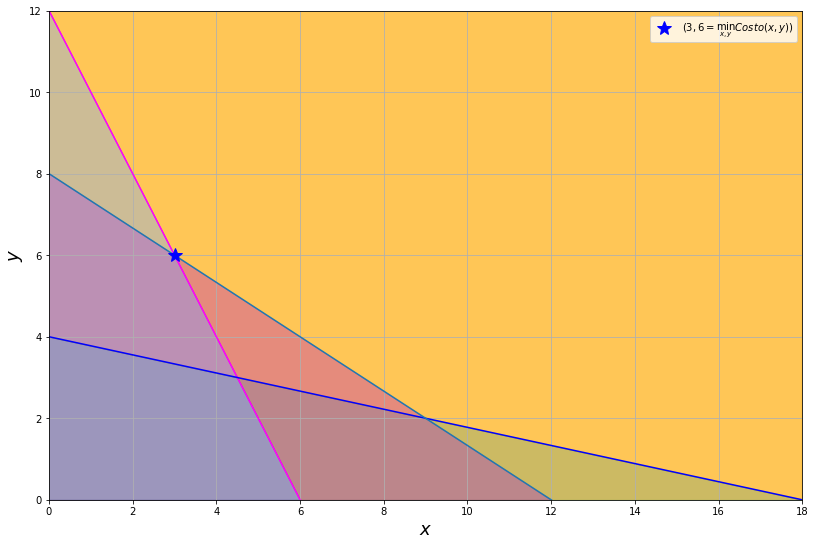

In [31]:
plt.figure(figsize = (13.5,9))
plt.plot(x, y_v1(x), 'magenta') #desigualdad 1
plt.plot(x, y_v2(x), 'blue') # desigualdad 2
plt.plot(x, y_v3(x)) # desigualdad 3
plt.plot([3], [6], '*b', label = '$(3,6=\min_{x, y}  Costo(x, y))$', markersize=15)
plt.xlim(xmin = 0, xmax = 18)
plt.ylim(ymin = 0, ymax = 12)
plt.fill_between(np.array([0, 18]), y_v1(np.array([0, 18])), 12, alpha = .3, color = 'red')
plt.fill_between(np.array([0, 18]), y_v2(np.array([0, 18])), 12, alpha = .3, color = 'orange')
plt.fill_between(np.array([0, 18]), y_v3(np.array([0, 18])), 12, alpha = .3, color = 'yellow')
plt.fill_between(np.array([0, 6]), y_v1(np.array([0, 6])), 0, alpha = .2, color = 'blue')
plt.fill_between(np.array([0, 18]), y_v2(np.array([0, 18])), 0, alpha = .2, color = 'green')
plt.fill_between(np.array([0, 12]), y_v3(np.array([0, 12])), 0, alpha = .2, color = 'purple')
plt.legend(loc='best')
plt.xlabel("$x$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.grid()
plt.show()

La región sombreada de color naranja representa al conjunto de valores que satisface las restricciones impuestas,
mientras que el punto representado con una estrella azul indica los valores para "x" y "y" que minimizan el costo
del alimento.

# Conclusion

> - Podemos concluir que al final pudimos obtener el resultado deseaso mediante la optmizacion matematica, y de forma se aconsejo correctamente al cliente respecto a la cantidad optima de sacos que debia comprar de cada marca para minimizar su gasto sin dejar de cumplir con el minimo de nutrientes requerido.

# Bibliografia 

> - Stanley I. Grossman. (2012). Algebra Lineal. Mexico : Mcgraw-Hill.